In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [96]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
os.chdir('/content/drive/Hangi Kredi')

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


# DATA
Goal is determine the segment(s) of customers our client should prioritize.

# Inputs
* age : age of customer (numeric)
* job : type of job (categorical
* marital : marital status (categorical)
* education (categorical)
* default: has credit in default? (binary)
* balance: average yearly balance, in euros (numeric)
* housing: has a housing loan? (binary)
* loan: has personal loan? (binary)
* contact: contact communication type (categorical)
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical)
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#Output
* y - has the client subscribed to a term deposit? (binary)

#Method
There are several ways to customer segmentation. For this study, I chose to use a partitioning method that requires that input variables have meaningful magnitude or be binary categorical variables. Except for age, the demographic variables in this data are multi-category variables, so we need to perform an extra step to convert multi-category variables into binary categorical variables.

In [97]:
import pandas as pd
data = pd.read_csv('term-deposit-marketing-2020.csv')
data.info()
print(data.shape)
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB
(40000, 14)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')


In [98]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


Let's examine the demographic variable age.

In [99]:
print(data['age'].unique())
print(data['age'].value_counts(sort=True))
print(data['age'].describe())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
94       1
86       1
90       1
81       1
95       1
Name: age, Length: 70, dtype: int64
count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


Let's examine the demographic variable job.

In [100]:
print(data['job'].unique())
print(data['job'].value_counts(sort=True))
print(data['job'].describe())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64
count           40000
unique             12
top       blue-collar
freq             9383
Name: job, dtype: object


Let's examine the demographic variable marital status.

In [101]:
print(data['marital'].unique())
print(data['marital'].value_counts(sort=True))
print(data['marital'].describe())

['married' 'single' 'divorced']
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64
count       40000
unique          3
top       married
freq        24386
Name: marital, dtype: object


Let's examine the demographic variable education level.

In [102]:
print(data['education'].unique())
print(data['education'].value_counts(sort=True))
print(data['education'].describe())

['tertiary' 'secondary' 'unknown' 'primary']
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64
count         40000
unique            4
top       secondary
freq          20993
Name: education, dtype: object


Let's edit multi-category variables.

In [103]:
demographicCats = ['job','marital','education']
for var in demographicCats:
    categoricList = 'var'+'_'+ var
    categoricList = pd.get_dummies(data[var], prefix=var)
    dataNew = pd.concat([data,categoricList],axis=1)
    data = dataNew
dataVars=data.columns.values.tolist()
toKeep=[i for i in dataVars if i not in demographicCats]
data = data[toKeep]
data.columns.values

array(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'y', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown'], dtype=object)

In [104]:
data['whitecollar'] = data['job_admin'] + data['job_management'] + data['job_entrepreneur'] + data['job_self-employed']
data['bluecollar'] = data['job_blue-collar'] + data['job_services'] + data['job_technician'] + data['job_housemaid']

data['divorced'] = data['marital_divorced']
data['married'] = data['marital_married']

data['primary'] = data['education_primary']
data['secondary'] = data['education_primary']
data['tertiary'] = data['education_primary']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
data.head()
print(data.columns.values)

['age' 'default' 'balance' 'housing' 'loan' 'contact' 'day' 'month'
 'duration' 'campaign' 'y' 'job_admin' 'job_blue-collar'
 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired'
 'job_self-employed' 'job_services' 'job_student' 'job_technician'
 'job_unemployed' 'job_unknown' 'marital_divorced' 'marital_married'
 'marital_single' 'education_primary' 'education_secondary'
 'education_tertiary' 'education_unknown' 'whitecollar' 'bluecollar'
 'divorced' 'married' 'primary' 'secondary' 'tertiary']


In [106]:
print(data['contact'].unique())

['unknown' 'cellular' 'telephone']


Customers without contact information should not be used. So, let's filter the dataset.

In [107]:
selectedData = data[data['contact']=='unknown']
print(selectedData.shape)

(12765, 37)


In [108]:
print(selectedData)

       age default  balance housing  ... married primary  secondary tertiary
0       58      no     2143     yes  ...       1       0          0        0
1       44      no       29     yes  ...       0       0          0        0
2       33      no        2     yes  ...       1       0          0        0
3       47      no     1506     yes  ...       1       0          0        0
4       33      no        1      no  ...       0       0          0        0
...    ...     ...      ...     ...  ...     ...     ...        ...      ...
26137   47      no     8515     yes  ...       0       0          0        0
27420   36      no        7      no  ...       0       0          0        0
27722   32      no     2223      no  ...       0       0          0        0
27726   32      no      232      no  ...       0       0          0        0
27728   28      no     6100      no  ...       0       0          0        0

[12765 rows x 37 columns]


Let's create new dataset.

In [109]:
data = pd.DataFrame(selectedData,columns=['y','age','whitecollar','bluecollar','divorced','married','primary','secondary','tertiary'])

In [110]:
data.head()

,y,age,whitecollar,bluecollar,divorced,married,primary,secondary,tertiary
0,no,58,1,0,0,1,0,0,0
1,no,44,0,1,0,0,0,0,0
2,no,33,1,0,0,1,0,0,0
3,no,47,0,1,0,1,0,0,0
4,no,33,0,0,0,0,0,0,0


In [111]:
X = pd.DataFrame(data,columns=['age','whitecollar','bluecollar','divorced','married','primary','secondary','tertiary']).values

In this study, the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 4, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 3.

For n_clusters = 2 The average silhouette_score is : 0.589136701825013
For n_clusters = 3 The average silhouette_score is : 0.5253505298337129
For n_clusters = 4 The average silhouette_score is : 0.4977155665765876
For n_clusters = 5 The average silhouette_score is : 0.4653796809643651
For n_clusters = 6 The average silhouette_score is : 0.44653518156018923


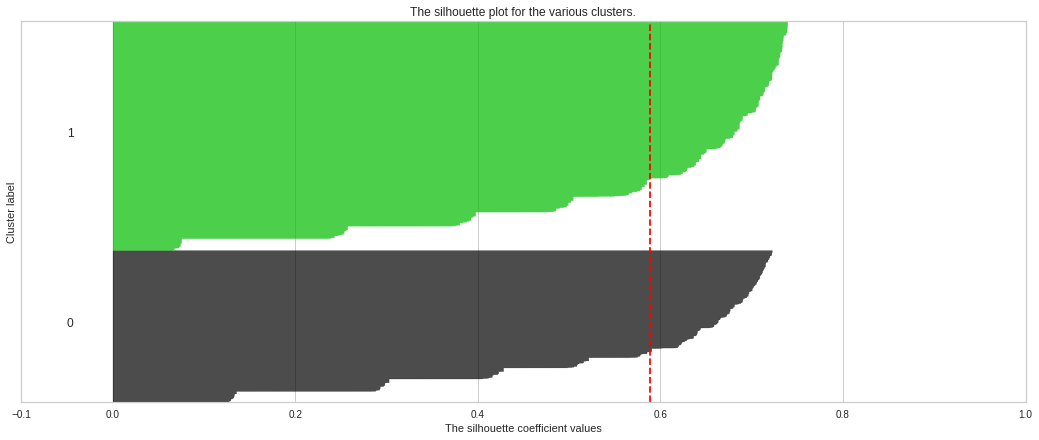

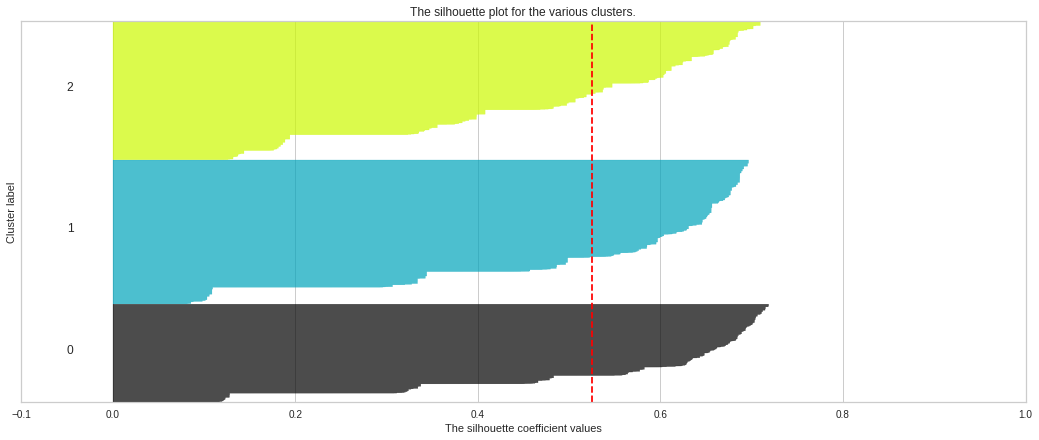

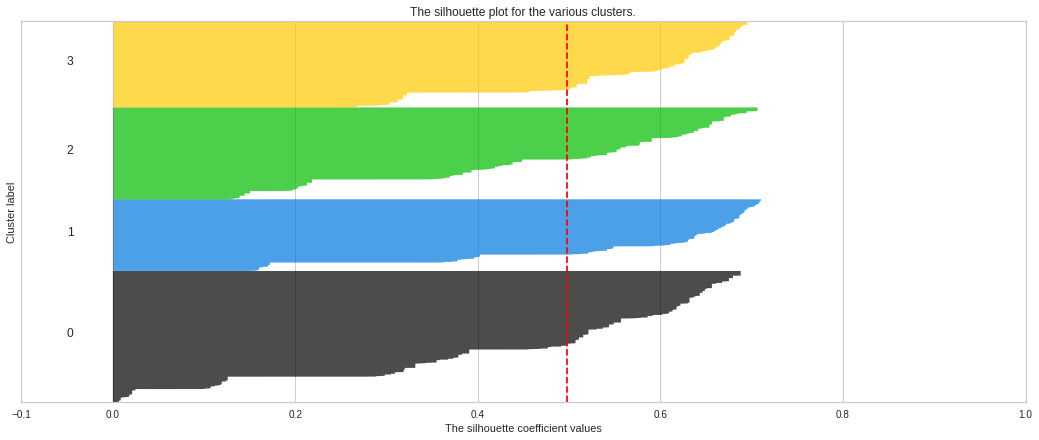

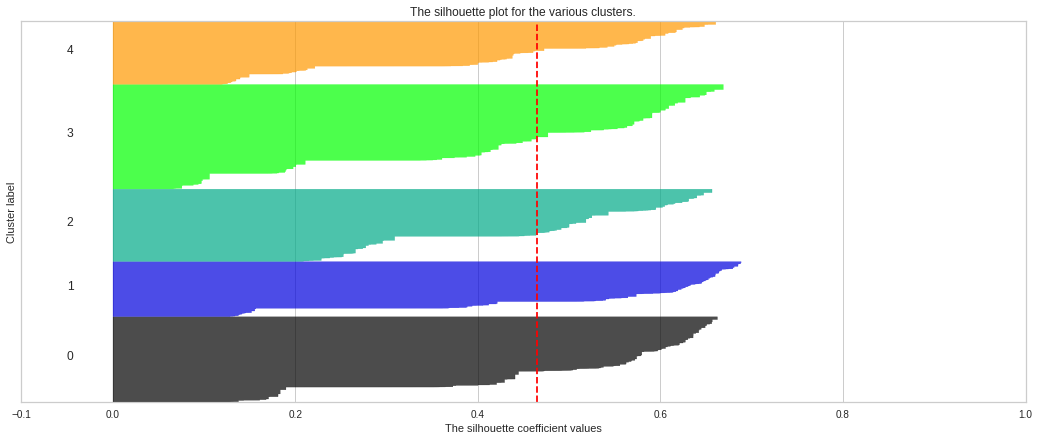

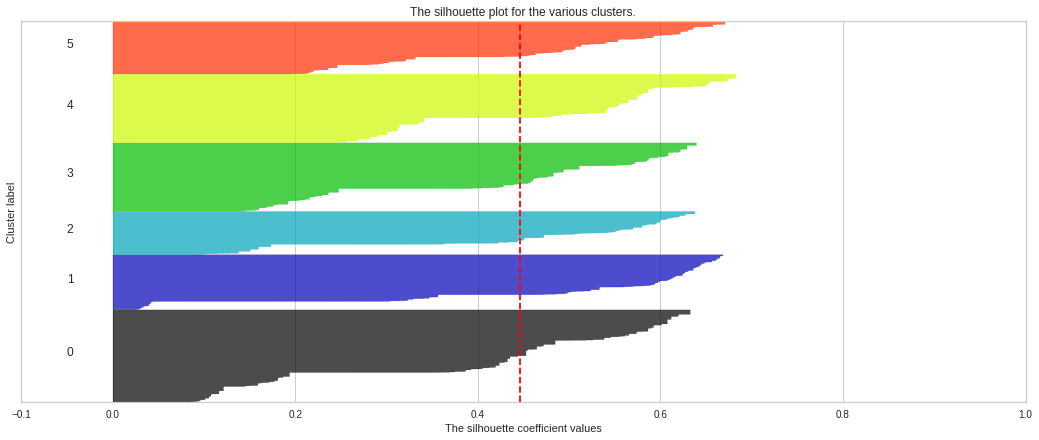

In [114]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [115]:
clusterModel = KMeans(n_clusters=2,random_state=1234)
clusterModel.fit(InputMatrix)
labels = clusterModel.predict(InputMatrix)
data['cluster'] = labels
data.pivot_table(index=['cluster'])
pd.crosstab(data.cluster,data.bluecollar,margins=True)
segments = data.groupby('cluster')
segments.describe()

age                                   ... tertiary                    
          count       mean       std   min   25%  ...      min  25%  50%  75%  max
cluster                                           ...                             
0        7675.0  34.208599  4.942635  20.0  31.0  ...      0.0  0.0  0.0  0.0  1.0
1        5090.0  50.465226  5.141128  43.0  46.0  ...      0.0  0.0  0.0  1.0  1.0

[2 rows x 64 columns]